# Backpropagation Practice

Implement a 3 input, 4 node hidden-layer, 1 output node Multilayer Perceptron on the following dataset:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 0  | 0  | 1  | 0 |
| 0  | 1  | 1  | 1 |
| 1  | 0  | 1  | 1 |
| 0  | 1  | 0  | 1 |
| 1  | 0  | 0  | 1 |
| 1  | 1  | 1  | 0 |
| 0  | 0  | 0  | 0 |

If you look at the data you'll notice that the first two columns behave like an XOR gate while the last column is mostly just noise. Remember that creating an XOR gate was what the perceptron was criticized for not being able to learn. 

In [6]:
# training data

import numpy as np

X = np.array([[0,0,1],[0,1,1],[1,0,1],[0,1,0], [1,0,0], [1,1,1], [0,0,0]])
y = [[0], [1], [1], [1], [1], [0], [0]]


In [3]:
class NeuralNetwork:
    def __init__(self):
        # Set up Architecture of Neural Network
        self.input = 3
        self.hiddenNodes = 4
        self.outputNodes = 1
        
        # Initial Weights
        # 3x4 Matrix Array for the First Layer
        self.weights1 = np.random.randn(self.input,self.hiddenNodes)
        # 4x1 Matrix Array for Hidden to Output
        self.weights2 = np.random.randn(self.hiddenNodes, self.outputNodes)

In [4]:
nn = NeuralNetwork()

print("Layer 1 weights: \n", nn.weights1)
print("Layer 2 weights: \n", nn.weights2)

Layer 1 weights: 
 [[-0.09576852 -0.79719475 -0.08461359 -0.89554281]
 [-0.50106216 -0.46304678  0.85022985 -0.67078977]
 [-0.88560674 -0.30941571 -0.68014494  0.42957375]]
Layer 2 weights: 
 [[-1.41734931]
 [ 0.88558848]
 [-0.34277147]
 [ 0.41367125]]


In [8]:
class NeuralNetwork:
    def __init__(self):
        # Set up Architecture of Neural Network
        self.input = 3
        self.hiddenNodes = 4
        self.outputNodes = 1
        
        # Initial Weights
        # 3x4 Matrix Array for the First Layer
        self.weights1 = np.random.randn(self.input,self.hiddenNodes)
        # 4x1 Matrix Array for Hidden to Output
        self.weights2 = np.random.randn(self.hiddenNodes, self.outputNodes)
    
    def sigmoid(self, x):
        return 1 / (1+np.exp(-x))
    
    def feed_forward(self,X):
        """
        Calculate the NN inference using feed forward.
        """
        
        # Weighted sum of inputs & hidden
        self.hidden_sum = np.dot(X, self.weights1)
        
        # Activations of weighted sum
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        
        # Weighted sum between hidden and output
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        
        # Final Activation of output
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output

In [9]:
# generate an output

nn = NeuralNetwork()

print(X[0])
output = nn.feed_forward(X[0])
print("output", output)

[0 0 1]
output [0.28078773]


In [11]:
# calculate error

output_all = nn.feed_forward(X)
error_all = y - output_all
print(output_all)
print(error_all)

[[0.28078773]
 [0.36811065]
 [0.2645386 ]
 [0.35927458]
 [0.26308314]
 [0.36424986]
 [0.28351458]]
[[-0.28078773]
 [ 0.63188935]
 [ 0.7354614 ]
 [ 0.64072542]
 [ 0.73691686]
 [-0.36424986]
 [-0.28351458]]


In [12]:
class NeuralNetwork:
    def __init__(self):
        # Set up Architecture of Neural Network
        self.input = 3
        self.hiddenNodes = 4
        self.outputNodes = 1
        
        # Initial Weights
        # 3x4 Matrix Array for the First Layer
        self.weights1 = np.random.randn(self.input,self.hiddenNodes)
        # 4x1 Matrix Array for Hidden to Output
        self.weights2 = np.random.randn(self.hiddenNodes, self.outputNodes)
    
    def sigmoid(self, x):
        return 1 / (1+np.exp(-x))
    
    def sigmoidPrime(self, x):
        return x * (1 - x)
    
    def feed_forward(self,X):
        """
        Calculate the NN inference using feed forward.
        """
        
        # Weighted sum of inputs & hidden
        self.hidden_sum = np.dot(X, self.weights1)
        
        # Activations of weighted sum
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        
        # Weighted sum between hidden and output
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        
        # Final Activation of output
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output
    
    def backward(self, X, y, o):
        """
        Backward propagate through the network
        """
        self.o_error = y - o #error in output
        self.o_delta = self.o_error * self.sigmoidPrime(o) # apply derivative of sigmoid to error
        
        self.z2_error = self.o_delta.dot(self.weights2.T) # z2 error: how much our hidden layer weights were off
        self.z2_delta = self.z2_error*self.sigmoidPrime(self.activated_hidden)
        
        self.weights1 += X.T.dot(self.z2_delta) #Adjust first set (input => hidden) weights
        self.weights2 += self.activated_hidden.T.dot(self.o_delta) #adjust second set (hidden => output) weights
        
    def train(self, X, y):
        o = self.feed_forward(X)
        self.backward(X, y, o)

In [14]:
nn = NeuralNetwork()

for i in range(1000):
    if ((i+1) % 100 ==0):
        print('+' + '---' * 3 + f'EPOCH {i+1}' + '---'*3 + '+')
        print('Predicted Output: \n', str(nn.feed_forward(X)))
        print("Loss: \n", str(np.mean(np.square(y - nn.feed_forward(X)))))
    nn.train(X,y)

+---------EPOCH 100---------+
Predicted Output: 
 [[0.13544093]
 [0.67572397]
 [0.65640884]
 [0.8272057 ]
 [0.80602869]
 [0.64864557]
 [0.2346043 ]]
Loss: 
 0.11211672304612329
+---------EPOCH 200---------+
Predicted Output: 
 [[0.05819767]
 [0.7996175 ]
 [0.79737584]
 [0.86177908]
 [0.86032445]
 [0.32554651]
 [0.1022775 ]]
Loss: 
 0.03423602379754021
+---------EPOCH 300---------+
Predicted Output: 
 [[0.03349886]
 [0.87698323]
 [0.87649251]
 [0.90677842]
 [0.90659006]
 [0.18983864]
 [0.07002269]]
Loss: 
 0.012838137822597804
+---------EPOCH 400---------+
Predicted Output: 
 [[0.02395483]
 [0.90737594]
 [0.90712577]
 [0.92747625]
 [0.92740037]
 [0.14080384]
 [0.05688848]]
Loss: 
 0.007338727684544891
+---------EPOCH 500---------+
Predicted Output: 
 [[0.01900635]
 [0.92357648]
 [0.92340883]
 [0.93907398]
 [0.93903086]
 [0.11532392]
 [0.04931362]]
Loss: 
 0.005032665493381891
+---------EPOCH 600---------+
Predicted Output: 
 [[0.0159613 ]
 [0.93382366]
 [0.93369661]
 [0.94660803]
 [0.94

## Try building/training a more complex MLP on a bigger dataset.

Use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) to build the cannonical handwriting digit recognizer and see what kind of accuracy you can achieve. 

If you need inspiration, the internet is chalk-full of tutorials, but I want you to see how far you can get on your own first. I've linked to the original MNIST dataset above but it will probably be easier to download data through a neural network library. If you reference outside resources make sure you understand every line of code that you're using from other sources, and share with your fellow students helpful resources that you find.


In [40]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


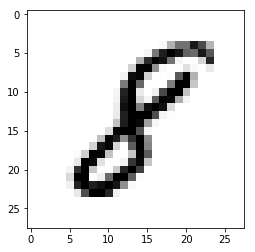

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 7777
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [43]:
x_train.shape

(60000, 28, 28)

In [44]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [45]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

W0716 23:21:24.174890 4435867072 deprecation_wrapper.py:119] From /Users/ljohnson/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0716 23:21:24.212881 4435867072 deprecation_wrapper.py:119] From /Users/ljohnson/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0716 23:21:24.231389 4435867072 deprecation.py:506] From /Users/ljohnson/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [46]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

W0716 23:21:58.079353 4435867072 deprecation.py:323] From /Users/ljohnson/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
60000/60000 [==============================] - 30s 500us/step - loss: 0.2019 - acc: 0.9405
Epoch 2/10
60000/60000 [==============================] - 30s 501us/step - loss: 0.0853 - acc: 0.9734
Epoch 3/10
60000/60000 [==============================] - 39s 653us/step - loss: 0.0616 - acc: 0.9809
Epoch 4/10
60000/60000 [==============================] - 33s 548us/step - loss: 0.0455 - acc: 0.9858
Epoch 5/10
60000/60000 [==============================] - 32s 541us/step - loss: 0.0356 - acc: 0.9884
Epoch 6/10
60000/60000 [==============================] - 33s 555us/step - loss: 0.0299 - acc: 0.9901
Epoch 7/10
60000/60000 [==============================] - 35s 580us/step - loss: 0.0259 - acc: 0.9916
Epoch 8/10
60000/60000 [==============================] - 34s 569us/step - loss: 0.0216 - acc: 0.9925
Epoch 9/10
60000/60000 [==============================] - 35s 583us/step - loss: 0.0195 - acc: 0.9933
Epoch 10/10
60000/60000 [==============================] - 34s 569us/step - loss: 

In [47]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 120us/step


[0.05793602261438791, 0.9855]

## Stretch Goals: 

- Implement Cross Validation model evaluation on your MNIST implementation 
- Research different [Gradient Descent Based Optimizers](https://keras.io/optimizers/)
 - [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)
- Build a housing price estimation model using a neural network. How does its accuracy compare with the regression models that we fit earlier on in class?